In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import os
from os.path import curdir
from datetime import datetime
import statsmodels.imputation.mice as mice
import statsmodels.regression.linear_model as sm
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import sqrt
from sklearn.preprocessing import LabelEncoder

In [5]:
from google.colab import files
uploaded = files.upload()


Saving Life-Expectancy-Data-Updated.csv to Life-Expectancy-Data-Updated (1).csv


In [8]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Life-Expectancy-Data-Updated (1).csv']))

In [9]:
#df = pd.read_csv('Life-Expectancy-Data-Updated.csv')

In [10]:
#df = pd.read_csv(r'C:\Users\kamal\Desktop\860\Project\Life-Expectancy-Data-Updated.csv')
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [11]:
#we check data types of all variables.
df.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

In [12]:
#here we can see outliers.
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


In [13]:
#check missing data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [14]:
#lets see how many are missing
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

<Axes: >

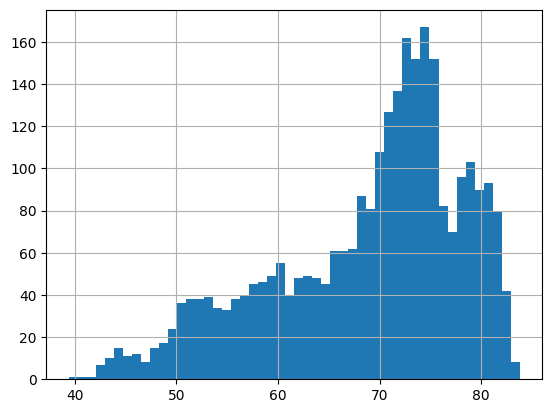

In [15]:
df['Life_expectancy'].hist(bins=50)

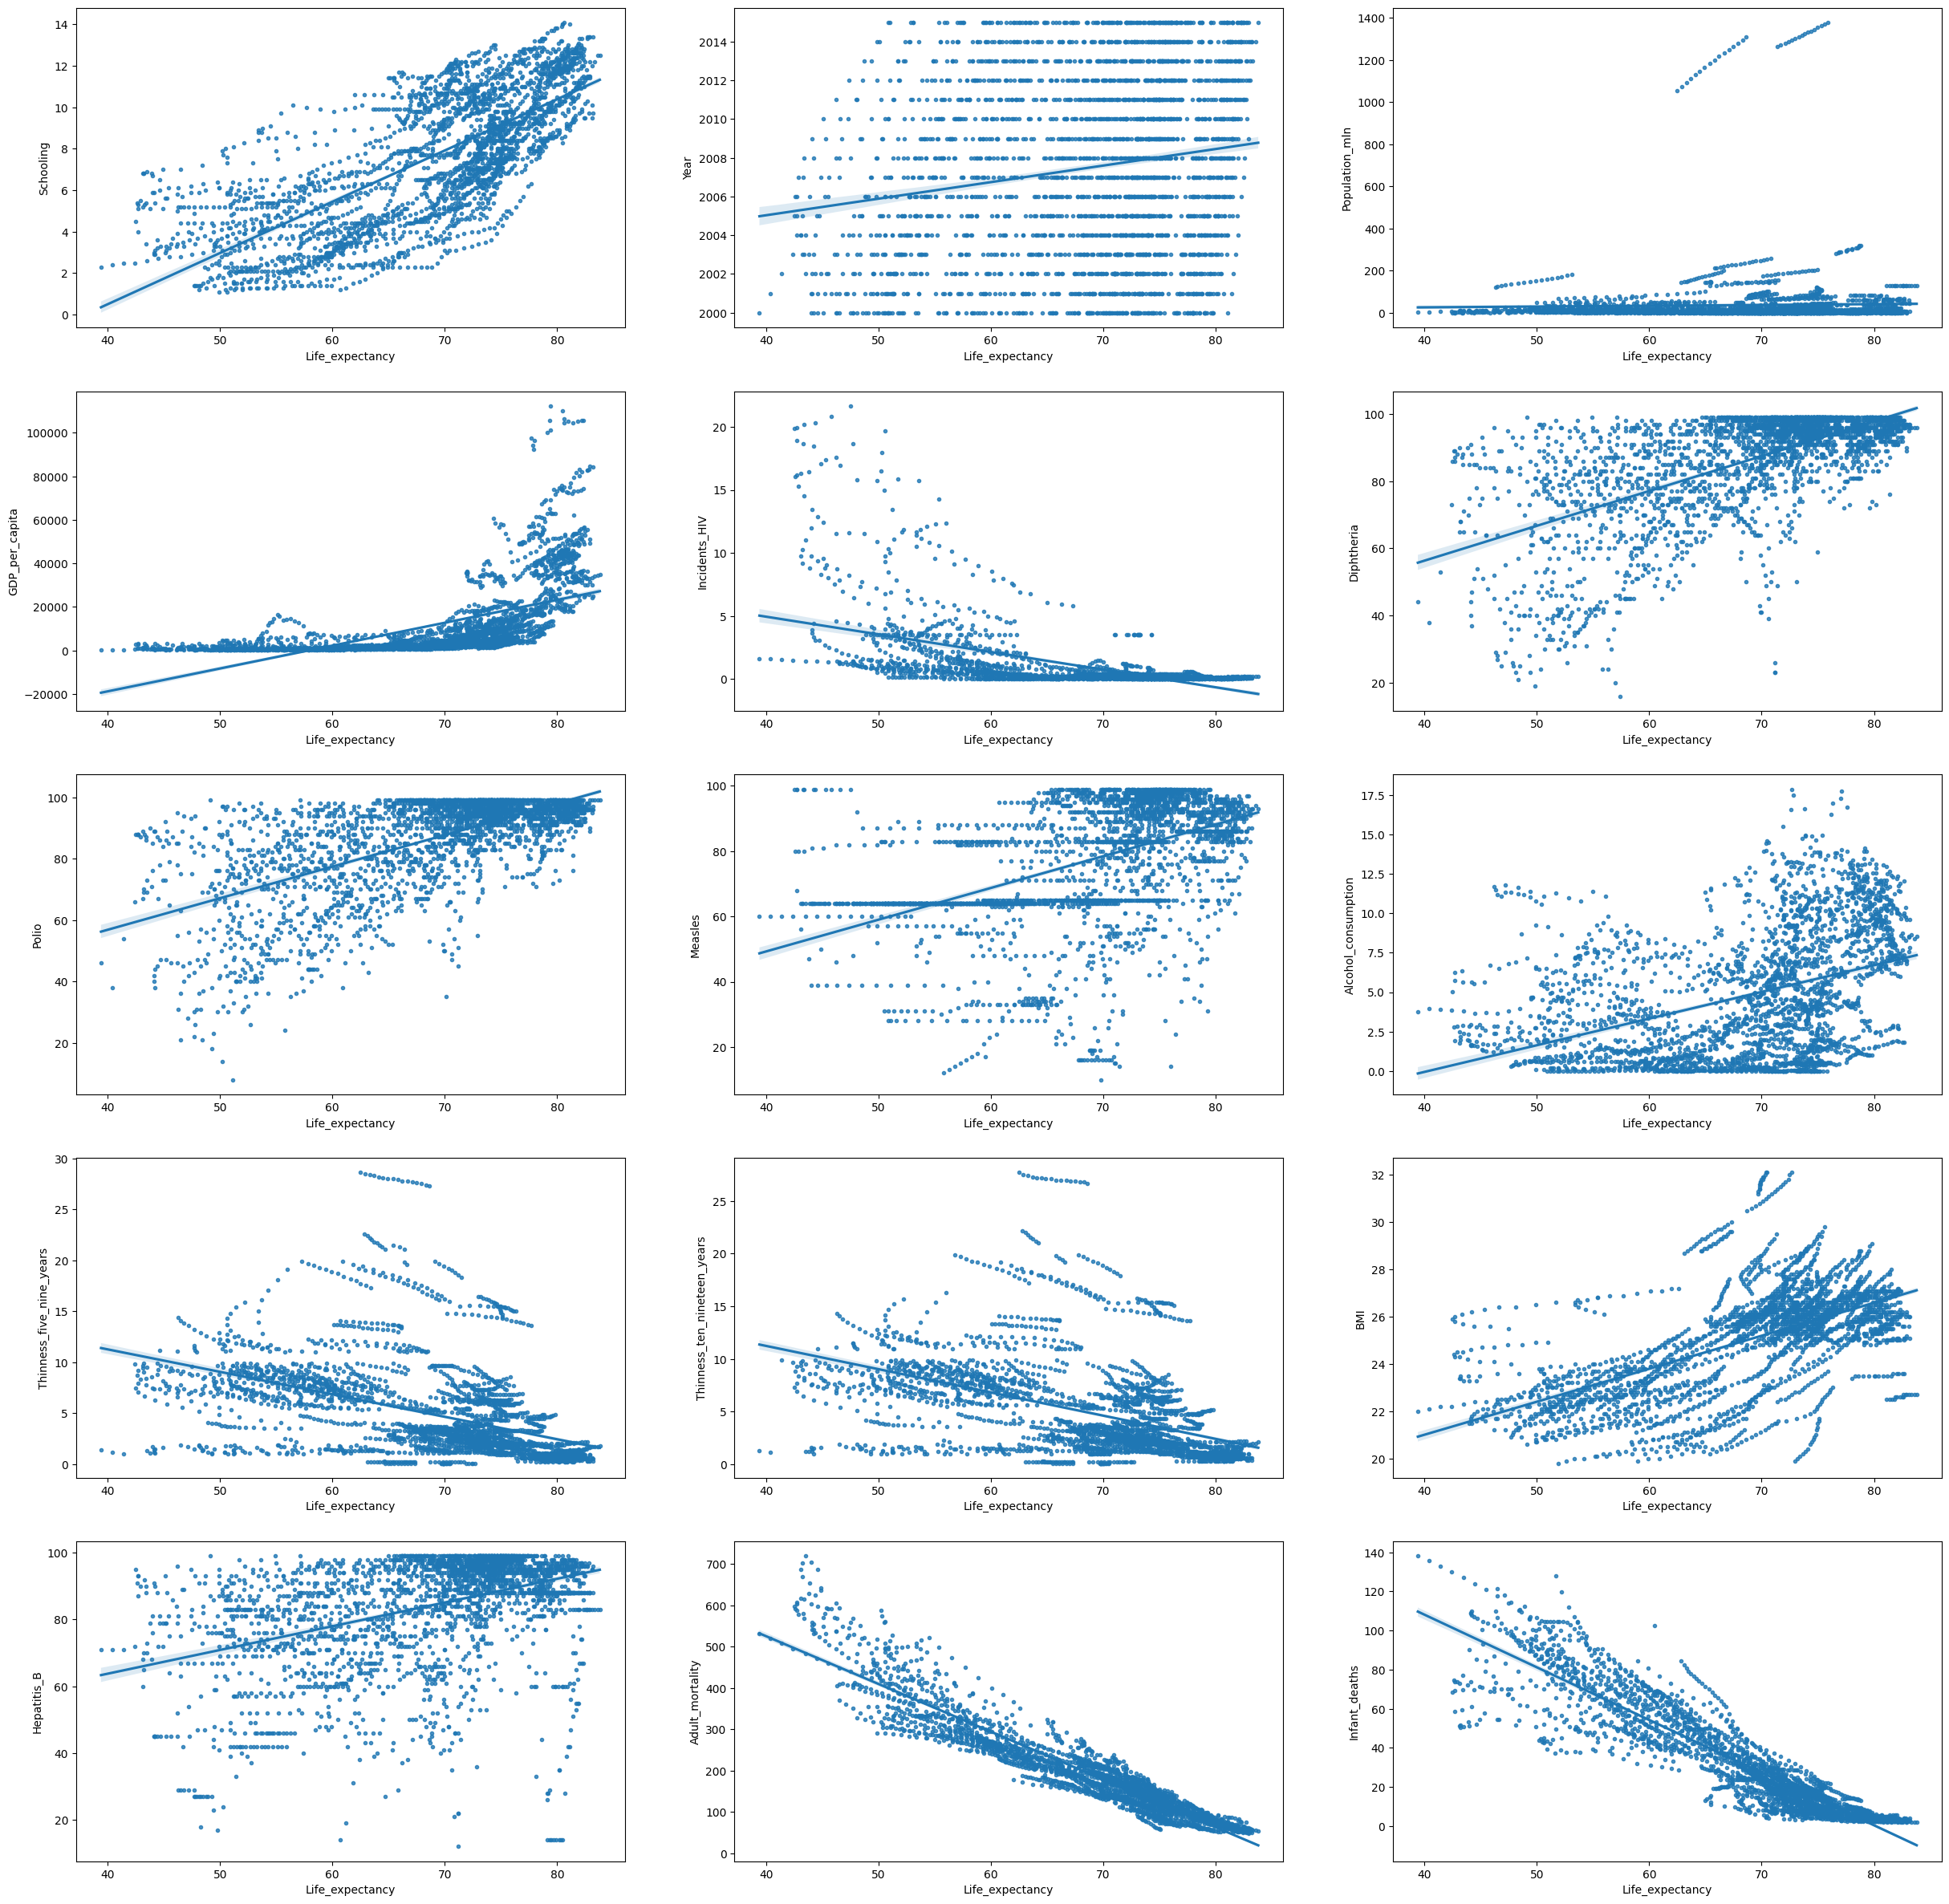

In [16]:
#here we can see if there is any correlation and also outliers
interest = [
    'Schooling', 'Year', 'Population_mln',
    'GDP_per_capita', 'Incidents_HIV', 'Diphtheria',
    'Polio', 'Measles', 'Alcohol_consumption',
    'Thinness_five_nine_years', 'Thinness_ten_nineteen_years', 'BMI',
    'Hepatitis_B','Adult_mortality', 'Infant_deaths'
]
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(30, 30))
for i, label in enumerate(interest):
    seaborn.regplot(
        x=df['Life_expectancy'],
        y=df[label],
        ax=axes[i//3][i%3],
        marker='.',

    )

## Model Buidling

In [17]:
# As there are over 193 countries in the dataset, we will use the region instead to avoid creating too many dummy variables, dropping the countries column and converting region to dummy variables
df_no_country = df.drop(columns=['Country','Economy_status_Developing'])
df_dummies = pd.get_dummies(df_no_country, prefix=['Region'], columns=['Region'],drop_first= False)
df_dummies.head(20)

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,...,Life_expectancy,Region_Africa,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America
0,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,...,76.5,0,0,0,0,1,0,0,0,0
1,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,...,82.8,0,0,0,1,0,0,0,0,0
2,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,...,65.4,0,1,0,0,0,0,0,0,0
3,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,...,67.0,0,0,0,0,0,0,0,0,1
4,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,...,81.7,0,0,0,0,1,0,0,0,0
5,2006,9.8,11.2,95.2200,4.19,88,86,26.4,89,89,...,78.2,0,0,1,0,0,0,0,0,0
6,2015,6.6,8.2,223.0000,8.06,97,97,26.2,97,97,...,71.2,0,0,0,0,0,0,0,1,0
7,2000,8.7,10.1,192.9690,12.23,88,99,25.9,99,99,...,71.2,0,0,0,1,0,0,0,0,0
8,2001,22.0,26.1,129.7640,0.52,97,87,27.9,97,99,...,71.9,0,0,0,0,1,0,0,0,0
9,2008,15.3,17.8,217.8570,7.72,97,92,26.5,96,90,...,68.7,0,0,0,0,0,0,0,1,0


In [18]:
df_dummies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  2864 non-null   int64  
 1   Infant_deaths                         2864 non-null   float64
 2   Under_five_deaths                     2864 non-null   float64
 3   Adult_mortality                       2864 non-null   float64
 4   Alcohol_consumption                   2864 non-null   float64
 5   Hepatitis_B                           2864 non-null   int64  
 6   Measles                               2864 non-null   int64  
 7   BMI                                   2864 non-null   float64
 8   Polio                                 2864 non-null   int64  
 9   Diphtheria                            2864 non-null   int64  
 10  Incidents_HIV                         2864 non-null   float64
 11  GDP_per_capita   

In [19]:
df_rename = df_dummies.rename(columns={'Alcohol_consumption':'Alcohol_Cons',
                                        'Population_mln': 'Population',
                                        'Thinness_ten_nineteen_years': 'Thin_ten_nineteen',
                                        'Thinness_five_nine_years':'Thin_five_nine',
                                        'Economy_status_Developed':'Developed_Country',
                                        'Region_Central America and Caribbean': 'Region_CAC',
                                        'Region_European Union': 'Region_EU',
                                        'Region_Middle East':'Region_ME',
                                        'Region_North America':'Region_NA',
                                        'Region_Rest of Europe': 'Region_RoU',
                                        'Region_South America': 'Region_SA',})
df_rename.head()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_Cons,Hepatitis_B,Measles,BMI,Polio,Diphtheria,...,Life_expectancy,Region_Africa,Region_Asia,Region_CAC,Region_EU,Region_ME,Region_NA,Region_Oceania,Region_RoU,Region_SA
0,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,...,76.5,0,0,0,0,1,0,0,0,0
1,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,...,82.8,0,0,0,1,0,0,0,0,0
2,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,...,65.4,0,1,0,0,0,0,0,0,0
3,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,...,67.0,0,0,0,0,0,0,0,0,1
4,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,...,81.7,0,0,0,0,1,0,0,0,0


In [20]:
for col in df_rename.columns:
    print(col)

Year
Infant_deaths
Under_five_deaths
Adult_mortality
Alcohol_Cons
Hepatitis_B
Measles
BMI
Polio
Diphtheria
Incidents_HIV
GDP_per_capita
Population
Thin_ten_nineteen
Thin_five_nine
Schooling
Developed_Country
Life_expectancy
Region_Africa
Region_Asia
Region_CAC
Region_EU
Region_ME
Region_NA
Region_Oceania
Region_RoU
Region_SA


In [21]:
model = ols('Life_expectancy ~ Year + Infant_deaths + Under_five_deaths + Adult_mortality + Alcohol_Cons + \
            Hepatitis_B + Measles + BMI  + Polio + Diphtheria + Incidents_HIV + GDP_per_capita + Population + \
            Thin_ten_nineteen + Thin_five_nine + Schooling + Developed_Country + Region_Asia + \
            Region_CAC + Region_EU + Region_ME + Region_Africa + Region_Oceania + Region_RoU + Region_SA',df_rename).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     6971.
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:43:29   Log-Likelihood:                -4563.0
No. Observations:                2864   AIC:                             9178.
Df Residuals:                    2838   BIC:                             9333.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            15.8870     10.36

In [22]:
# Removing the insignificant variables and re-running the model
model1 = ols('Life_expectancy ~ Year + Infant_deaths + Under_five_deaths + Adult_mortality + Hepatitis_B + BMI + \
            Incidents_HIV + GDP_per_capita + Thin_ten_nineteen + Schooling + Developed_Country + \
            Region_Asia + Region_CAC + Region_EU + Region_ME + Region_Africa + Region_Oceania + Region_RoU + Region_SA',df_rename).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     9158.
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:43:29   Log-Likelihood:                -4568.1
No. Observations:                2864   AIC:                             9176.
Df Residuals:                    2844   BIC:                             9295.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            17.3767     10.31

# Assessing the Model

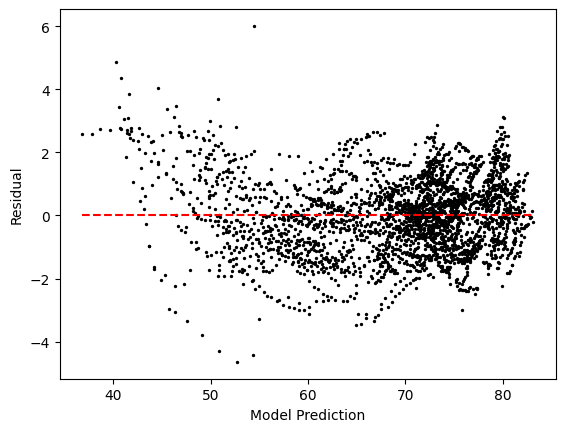

In [23]:
#lets make df_rename1 model matching model1 (dropped 6 non significant variables and North America region)
df_rename1=df_rename.drop(columns=['Alcohol_Cons', 'Measles','Polio','Diphtheria','Population', 'Thin_five_nine','Region_NA'])
# Assessment #1: Check for Heteroskedasticity by plotting the residual
train_y = df_rename1['Life_expectancy'].values
train_X = df_rename1.drop(columns=['Life_expectancy'])
#.values
reg = LinearRegression().fit(train_X, train_y)

# Obtain the residuals
predicted_y = reg.predict(train_X)
residuals = train_y - predicted_y

plt.scatter(predicted_y,residuals,s=2,c='black')

#This line adds the dashed horizontal line
plt.hlines(0,min(predicted_y),max(predicted_y),color='red',linestyles='dashed')

plt.xlabel("Model Prediction")
plt.ylabel("Residual")
plt.show()

In [24]:
# Checking for Heteroskedasticity by runnning the Pagan Test
bp = het_breuschpagan(model1.resid,model1.model.exog)
measures = ('LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value')
print(dict(zip(measures,bp)))

{'LM Statistic': 498.37667296122527, 'LM-Test p-value': 1.2239467995000651e-93, 'F-Statistic': 31.53465641984266, 'F-Test p-value': 1.6895303099879146e-103}


In [25]:
df_rename1.head()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Hepatitis_B,BMI,Incidents_HIV,GDP_per_capita,Thin_ten_nineteen,Schooling,Developed_Country,Life_expectancy,Region_Africa,Region_Asia,Region_CAC,Region_EU,Region_ME,Region_Oceania,Region_RoU,Region_SA
0,2015,11.1,13.0,105.8240,97,27.8,0.08,11006,4.9,7.8,0,76.5,0,0,0,0,1,0,0,0
1,2015,2.7,3.3,57.9025,97,26.0,0.09,25742,0.6,9.7,1,82.8,0,0,0,1,0,0,0,0
2,2007,51.5,67.9,201.0765,60,21.2,0.13,1076,27.1,5.0,0,65.4,0,1,0,0,0,0,0,0
3,2006,32.8,40.5,222.1965,93,25.3,0.79,4146,5.7,7.9,0,67.0,0,0,0,0,0,0,0,1
4,2012,3.4,4.3,57.9510,97,27.0,0.08,33995,1.2,12.8,1,81.7,0,0,0,0,1,0,0,0


In [26]:
for col in df_rename1[['Year', 'Infant_deaths', 'Under_five_deaths',  'Adult_mortality',  'Hepatitis_B', 'BMI', 'Incidents_HIV', 'GDP_per_capita', 'Thin_ten_nineteen', 'Schooling']]:
    interaction_col_name = f'Africa_{col}'
    df_rename1[interaction_col_name] = df_rename1['Region_Africa'] * df_rename1[col]

df_rename1.head(20)

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Hepatitis_B,BMI,Incidents_HIV,GDP_per_capita,Thin_ten_nineteen,Schooling,...,Africa_Year,Africa_Infant_deaths,Africa_Under_five_deaths,Africa_Adult_mortality,Africa_Hepatitis_B,Africa_BMI,Africa_Incidents_HIV,Africa_GDP_per_capita,Africa_Thin_ten_nineteen,Africa_Schooling
0,2015,11.1,13.0,105.8240,97,27.8,0.08,11006,4.9,7.8,...,0,0.0,0.0,0.0000,0,0.0,0.00,0,0.0,0.0
1,2015,2.7,3.3,57.9025,97,26.0,0.09,25742,0.6,9.7,...,0,0.0,0.0,0.0000,0,0.0,0.00,0,0.0,0.0
2,2007,51.5,67.9,201.0765,60,21.2,0.13,1076,27.1,5.0,...,0,0.0,0.0,0.0000,0,0.0,0.00,0,0.0,0.0
3,2006,32.8,40.5,222.1965,93,25.3,0.79,4146,5.7,7.9,...,0,0.0,0.0,0.0000,0,0.0,0.00,0,0.0,0.0
4,2012,3.4,4.3,57.9510,97,27.0,0.08,33995,1.2,12.8,...,0,0.0,0.0,0.0000,0,0.0,0.00,0,0.0,0.0
5,2006,9.8,11.2,95.2200,88,26.4,0.16,9110,2.0,7.9,...,0,0.0,0.0,0.0000,0,0.0,0.00,0,0.0,0.0
6,2015,6.6,8.2,223.0000,97,26.2,0.08,9313,2.3,12.0,...,0,0.0,0.0,0.0000,0,0.0,0.00,0,0.0,0.0
7,2000,8.7,10.1,192.9690,88,25.9,0.08,8971,2.3,10.2,...,0,0.0,0.0,0.0000,0,0.0,0.00,0,0.0,0.0
8,2001,22.0,26.1,129.7640,97,27.9,0.13,3708,4.0,9.6,...,0,0.0,0.0,0.0000,0,0.0,0.00,0,0.0,0.0
9,2008,15.3,17.8,217.8570,97,26.5,0.43,2235,2.9,10.9,...,0,0.0,0.0,0.0000,0,0.0,0.00,0,0.0,0.0


In [27]:
# Check all the new variables are created properly
for col in df_rename1.columns:
    print(col)

Year
Infant_deaths
Under_five_deaths
Adult_mortality
Hepatitis_B
BMI
Incidents_HIV
GDP_per_capita
Thin_ten_nineteen
Schooling
Developed_Country
Life_expectancy
Region_Africa
Region_Asia
Region_CAC
Region_EU
Region_ME
Region_Oceania
Region_RoU
Region_SA
Africa_Year
Africa_Infant_deaths
Africa_Under_five_deaths
Africa_Adult_mortality
Africa_Hepatitis_B
Africa_BMI
Africa_Incidents_HIV
Africa_GDP_per_capita
Africa_Thin_ten_nineteen
Africa_Schooling


In [28]:
modelA = ols('Life_expectancy ~ Year + Infant_deaths + Under_five_deaths + Adult_mortality + Hepatitis_B + BMI + \
            Incidents_HIV + GDP_per_capita + Thin_ten_nineteen + Schooling + Developed_Country + \
            Region_Asia + Region_CAC + Region_EU + Region_ME + Region_Africa + Region_Oceania + Region_RoU + Region_SA + \
            Africa_Year + Africa_Infant_deaths + Africa_Under_five_deaths + Africa_Adult_mortality + \
            Africa_Hepatitis_B + Africa_BMI + Africa_Incidents_HIV + \
            Africa_GDP_per_capita + \
            Africa_Thin_ten_nineteen + Africa_Schooling',df_rename1).fit()
print(modelA.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     7060.
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:43:30   Log-Likelihood:                -4333.7
No. Observations:                2864   AIC:                             8727.
Df Residuals:                    2834   BIC:                             8906.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [29]:
# Assessment #2: Model Diagnostic Plots:

import statsmodels
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

style_talk = 'seaborn-talk'

class LinearRegDiagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Authors:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.

        Matt Spinelli (m3spinelli@gmail.com, where 3 = r)
        (1) Fixed incorrect annotation of the top most extreme residuals in
            the Residuals vs Fitted and, especially, the Normal Q-Q plots.
        (2) Changed Residuals vs Leverage plot to match closer the y-axis
            range shown in the equivalent plot in the R package ggfortify.
        (3) Added horizontal line at y=0 in Residuals vs Leverage plot to
            match the plots in R package ggfortify and base R.
        (4) Added option for placing a vertical guideline on the Residuals
            vs Leverage plot using the rule of thumb of h = 2p/n to denote
            high leverage (high_leverage_threshold=True).
        (5) Added two more ways to compute the Cook's Distance (D) threshold:
            * 'baseR': D > 1 and D > 0.5 (default)
            * 'convention': D > 4/n
            * 'dof': D > 4 / (n - k - 1)
        (6) Fixed class name to conform to Pascal casing convention
        (7) Fixed Residuals vs Leverage legend to work with loc='best'
    """

    def __init__(self, results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)
        self.nresids = len(self.residual_norm)

    def __call__(self, plot_context='seaborn-paper', **kwargs):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(
                ax=ax[1,1],
                high_leverage_threshold = kwargs.get('high_leverage_threshold'),
                cooks_threshold = kwargs.get('cooks_threshold'))
            plt.show()

        return self.vif_table(), fig, ax,

    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.argsort(residual_abs), 0)
        abs_resid_top_3 = abs_resid[:3]
        for i in abs_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        fig = QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for i, x, y in self.__qq_top_resid(QQ.theoretical_quantiles, abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(x, y),
                ha='right',
                color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')

        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None, high_leverage_threshold=False, cooks_threshold='baseR',
                      set_ylim=False, set_xlim=False):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        factors = []
        if cooks_threshold == 'baseR' or cooks_threshold is None:
            factors = [1, 0.5]
        elif cooks_threshold == 'convention':
            factors = [4/self.nresids]
        elif cooks_threshold == 'dof':
            factors = [4/ (self.nresids - self.nparams)]
        else:
            raise ValueError("threshold_method must be one of the following: 'convention', 'dof', or 'baseR' (default)")
        for i, factor in enumerate(factors):
            label = "Cook's distance" if i == 0 else None
            xtemp, ytemp = self.__cooks_dist_line(factor)
            ax.plot(xtemp, ytemp, label=label, lw=1.25, ls='--', color='red')
            ax.plot(xtemp, np.negative(ytemp), lw=1.25, ls='--', color='red')

        if high_leverage_threshold:
            high_leverage = 2 * self.nparams / self.nresids
            if max(self.leverage) > high_leverage:
                ax.axvline(high_leverage, label='High leverage', ls='-.', color='purple', lw=1)

        ax.axhline(0, ls='dotted', color='black', lw=1.25)
        if set_xlim:
            ax.set_xlim(0, max(self.leverage)+0.01)
        if set_ylim:
            ax.set_ylim(min(self.residual_norm)-0.1, max(self.residual_norm)+0.1)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        plt.legend(loc='best')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        return (vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y


    def __qq_top_resid(self, quantiles, top_residual_indices):
        """
        Helper generator function yielding the index and coordinates
        """
        offset = 0
        quant_index = 0
        previous_is_negative = None
        for resid_index in top_residual_indices:
            y = self.residual_norm[resid_index]
            is_negative = y < 0
            if previous_is_negative == None or previous_is_negative == is_negative:
                offset += 1
            else:
                quant_index -= offset
            x = quantiles[quant_index] if is_negative else np.flip(quantiles, 0)[quant_index]
            quant_index += 1
            previous_is_negative = is_negative
            yield resid_index, x, y

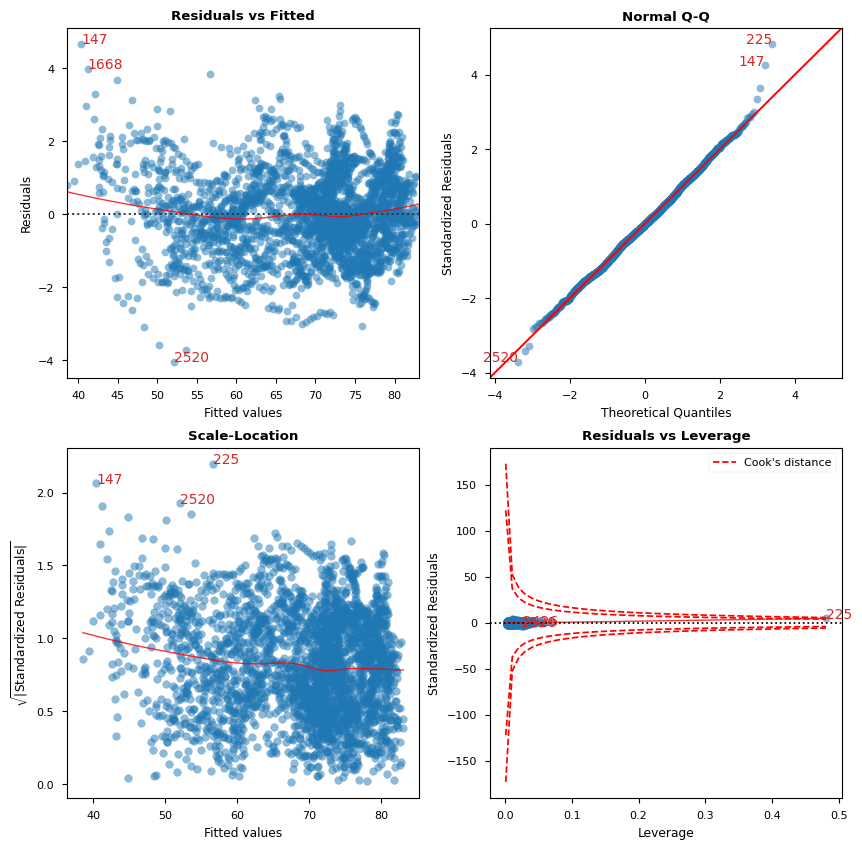

                    Features  VIF Factor
1                       Year        1.65
5                Hepatitis_B        2.27
8             GDP_per_capita        2.90
27     Africa_GDP_per_capita        3.03
9          Thin_ten_nineteen        3.14
17            Region_Oceania        4.87
6                        BMI        5.64
19                 Region_SA        5.80
15                 Region_ME        6.31
18                Region_RoU        6.34
10                 Schooling        7.06
11         Developed_Country        7.48
13                Region_CAC        8.52
28  Africa_Thin_ten_nineteen        8.76
14                 Region_EU        9.79
12               Region_Asia       12.09
4            Adult_mortality       17.02
29          Africa_Schooling       18.78
24        Africa_Hepatitis_B       40.65
23    Africa_Adult_mortality       66.90
7              Incidents_HIV      379.51
2              Infant_deaths      387.97
26      Africa_Incidents_HIV      395.85
25              

In [30]:
cls = LinearRegDiagnostic(modelA)
vif, fig, ax = cls()
print(vif)

In [31]:
# Checking for Heteroskedasticity again by runnning the Pagan Test
bp = het_breuschpagan(modelA.resid,modelA.model.exog)
measures = ('LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value')
print(dict(zip(measures,bp)))

{'LM Statistic': 435.21178205803886, 'LM-Test p-value': 5.220647412289726e-74, 'F-Statistic': 17.51107647215515, 'F-Test p-value': 5.665348229639445e-81}


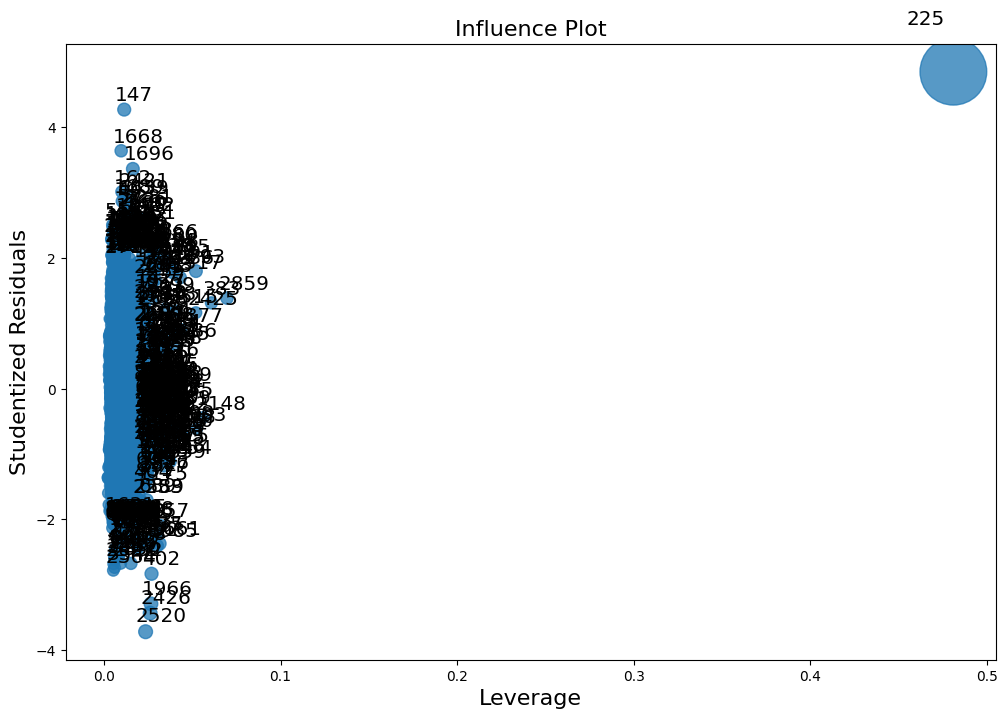

In [32]:
# Assessment #3: Check for outliers
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(modelA, ax=ax, criterion="cooks")
plt.show()

In [33]:
# Remove Outliers
#from statsmodels.stats.outliers_influence import OLSInfluence
# Get influence statistics
#influence = model1.get_influence()

# Calculate Cook's distance
#cook_distance = influence.cooks_distance[0]

# Set a threshold for Cook's distance (adjust as needed)
#cook_threshold = 4 / (len(train_y) - len(train_X.columns) - 1)

# Identify and remove outliers
#outliers = cook_distance > cook_threshold
#df_rename_1 = df_rename[~outliers]

In [34]:
# Re-run the model with the new dataframe
#model2 = ols('Life_expectancy ~ Year + Infant_deaths + Under_five_deaths + Adult_mortality + Hepatitis_B + BMI + \
#            Incidents_HIV + GDP_per_capita + Thin_ten_nineteen + Schooling + Developed_Country + \
#            Region_Asia + Region_CAC + Region_EU + Region_ME + Region_NA + Region_Oceania + Region_RoU + Region_SA',df_rename_1).fit()
#print(model2.summary())

In [35]:
# Check if outliers are removed
#fig, ax = plt.subplots(figsize=(12,8))
#fig = sm.graphics.influence_plot(model2, ax=ax, criterion="cooks")
#plt.show()

In [36]:
# Assessment #4: Cross Validation
train_set = df_rename1.iloc[:2360]
train_set.head()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Hepatitis_B,BMI,Incidents_HIV,GDP_per_capita,Thin_ten_nineteen,Schooling,...,Africa_Year,Africa_Infant_deaths,Africa_Under_five_deaths,Africa_Adult_mortality,Africa_Hepatitis_B,Africa_BMI,Africa_Incidents_HIV,Africa_GDP_per_capita,Africa_Thin_ten_nineteen,Africa_Schooling
0,2015,11.1,13.0,105.8240,97,27.8,0.08,11006,4.9,7.8,...,0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
1,2015,2.7,3.3,57.9025,97,26.0,0.09,25742,0.6,9.7,...,0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
2,2007,51.5,67.9,201.0765,60,21.2,0.13,1076,27.1,5.0,...,0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
3,2006,32.8,40.5,222.1965,93,25.3,0.79,4146,5.7,7.9,...,0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
4,2012,3.4,4.3,57.9510,97,27.0,0.08,33995,1.2,12.8,...,0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0


In [37]:
test_set = df_rename1.iloc[2361:2864]

test_set.tail(10)

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Hepatitis_B,BMI,Incidents_HIV,GDP_per_capita,Thin_ten_nineteen,Schooling,...,Africa_Year,Africa_Infant_deaths,Africa_Under_five_deaths,Africa_Adult_mortality,Africa_Hepatitis_B,Africa_BMI,Africa_Incidents_HIV,Africa_GDP_per_capita,Africa_Thin_ten_nineteen,Africa_Schooling
2854,2013,20.1,23.7,189.5420,99,27.4,0.11,4902,4.0,10.3,...,0,0.0,0.0,0.000,0,0.0,0.00,0,0.0,0.0
2855,2001,3.4,4.2,98.8365,88,25.8,0.08,38785,0.9,9.4,...,0,0.0,0.0,0.000,0,0.0,0.00,0,0.0,0.0
2856,2014,2.1,2.8,55.5820,83,22.7,0.17,34387,2.0,12.5,...,0,0.0,0.0,0.000,0,0.0,0.00,0,0.0,0.0
2857,2000,9.9,12.7,239.7160,70,25.7,0.05,2617,2.7,8.9,...,0,0.0,0.0,0.000,0,0.0,0.00,0,0.0,0.0
2858,2007,19.7,23.1,129.9335,97,25.6,0.14,5305,7.5,8.9,...,0,0.0,0.0,0.000,0,0.0,0.00,0,0.0,0.0
2859,2000,97.0,224.9,291.8240,72,20.8,0.49,399,12.8,1.1,...,2000,97.0,224.9,291.824,72,20.8,0.49,399,12.8,1.1
2860,2009,23.9,28.6,235.2330,97,25.3,0.02,2515,2.2,9.1,...,0,0.0,0.0,0.000,0,0.0,0.00,0,0.0,0.0
2861,2004,17.7,28.9,134.8950,62,21.9,0.02,2130,15.4,10.3,...,0,0.0,0.0,0.000,0,0.0,0.00,0,0.0,0.0
2862,2002,7.9,9.9,204.0120,94,26.1,0.05,7424,3.3,11.1,...,0,0.0,0.0,0.000,0,0.0,0.00,0,0.0,0.0
2863,2011,2.1,2.6,50.5745,88,26.1,0.05,48934,0.9,11.0,...,0,0.0,0.0,0.000,0,0.0,0.00,0,0.0,0.0


In [38]:
Y_train = train_set[(['Life_expectancy'])]
X_train = train_set.drop(['Life_expectancy'], axis = 1)

Y_test = test_set[(['Life_expectancy'])]
X_test = test_set.drop(['Life_expectancy'], axis = 1)

# Actual life expectancy in the testing set
Y_test[0:5]

,Life_expectancy
2361,74.1
2362,76.3
2363,73.1
2364,72.8
2365,80.4


In [39]:
lm1 = LinearRegression().fit(X_train, Y_train)
Y_pred = lm1.predict(X_test)

# Predicted life expectancy for the first 4 entries in the testing data
Y_pred[0:5]

array([[74.59881367],
       [76.52054913],
       [73.69189457],
       [75.79989639],
       [80.51360119]])

In [40]:
# Calculating the metric for model quality, using MAPE (mean absolute percenage error here)
percent_errors = np.abs((Y_test - Y_pred) / Y_test) *100
percent_errors[0:5]

,Life_expectancy
2361,0.673163
2362,0.289055
2363,0.809705
2364,4.120737
2365,0.141295


In [41]:
print("Linear Model MAPE = ", np.mean(percent_errors), "%")

Linear Model MAPE =  Life_expectancy    1.341235
dtype: float64 %


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [42]:
# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.265309033183804


<function matplotlib.pyplot.show(close=None, block=None)>

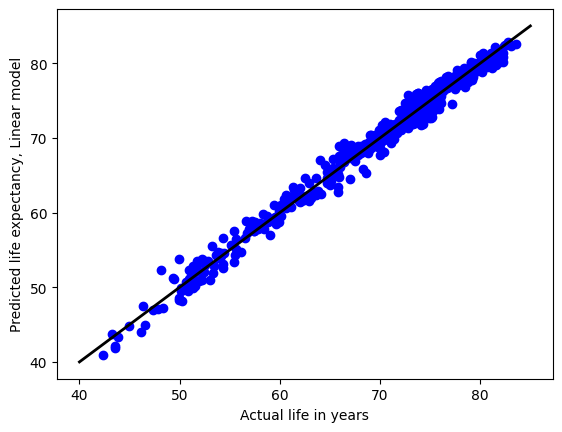

In [50]:
plt.scatter(Y_test, Y_pred, color='blue') # actual vs predicted prices for the linear model
plt.ylabel('Predicted life expectancy, Linear model') # vertical axis title
plt.xlabel('Actual life in years') # horizontal axis title
plt.plot([40, 85], [40, 85], color='black', lw=2) # 45-degree line (at which error = 0)

plt.show

# # Random Forests Model

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting the data
X = df_rename1.drop(columns=['Life_expectancy']).values
y = df_rename1['Life_expectancy'].values
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2,random_state=42)

# Initializing and fitting the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train1, y_train1)

RandomForestRegressor(random_state=42)

In [52]:
y_pred1 = rf_model.predict(X_test1)

# Evaluating the model
mse = mean_squared_error(y_test1, y_pred1)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.2407479860383958


In [53]:
percent_errors1 = np.abs((y_test1 - y_pred1) / y_test1) *100
print("Linear Model MAPE = ", np.mean(percent_errors1), "%")

Linear Model MAPE =  0.55428514632366 %


<function matplotlib.pyplot.show(close=None, block=None)>

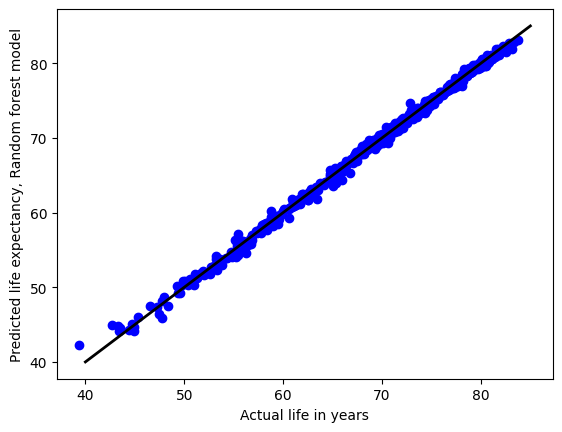

In [55]:
plt.scatter(y_test1, y_pred1, color='blue') # actual vs predicted prices for the linear model
plt.ylabel('Predicted life expectancy, Random forest model') # vertical axis title
plt.xlabel('Actual life in years') # horizontal axis title
plt.plot([40, 85], [40, 85], color='black', lw=2) # 45-degree line (at which error = 0)

plt.show

# #Creating New Variables and Hypothesis Testing

In [ ]:
# As we can see as per below df and bar chart, average life expectancy is much lower than all the other regions.
# We are looking to see which variables(s) may have cause this disparity
df_1 = df.drop(columns=['Country','Economy_status_Developing'])
df_1.groupby(['Region']).mean()


In [ ]:
df.head(18          )

In [ ]:
df_LE_RE = df_1[['Region','Life_expectancy']]
df_2 = df_LE_RE.groupby(['Region']).mean()
df_2

In [ ]:
df_2_sorted = df_2.sort_values('Life_expectancy', ascending=False)
df_2_sorted.plot(kind="bar", figsize=(10,7))
plt.ylabel("Life Expectancy")

### Africa Region and Non-Africa Regions

In [ ]:
# As shown in the average life expectancy by region plot, we can clear see that the average life expectancy of Africa
# is clearly lower than the other regions, we want to look into this and identify the key factors (variables) that caused this

# Split regions into Africa and non-African regions by creating dummy variable

df_1['Region'] = np.where(df_1['Region']=='Africa',1,0)
df_Africa = df_1.rename(columns={'Region':'Region_Africa'})
df_Africa.head(20)

In [ ]:
# Moving the other categorical column 'Economy_status_Developed' to the back in preparation of the next step

column_to_move = 'Economy_status_Developed'
other_columns = [col for col in df_Africa.columns if col != column_to_move]
new_columns_order = other_columns + [column_to_move]
df_Africa_new_order = df_Africa[new_columns_order]


In [ ]:
# Creating a for-loop to interate through all other variables (except Life-expectancy) in order to create interactive variables
for col in df_Africa_new_order.columns[1:17]:
    interaction_col_name = f'Africa_{col}'
    df_Africa_new_order[interaction_col_name] = df_Africa_new_order['Region_Africa'] * df_Africa_new_order[col]

df_Africa_new_order.head(20)

In [ ]:
# Check all the new variables are created properly
for col in df_Africa_new_order.columns:
    print(col)

In [ ]:
# Re-run the linear regression model with the new interactive variables
model_Africa = ols('Life_expectancy ~ Region_Africa + Year + Infant_deaths + Under_five_deaths + Adult_mortality + Alcohol_consumption + \
            Hepatitis_B + Measles + BMI  + Polio + Diphtheria + Incidents_HIV + GDP_per_capita + Population_mln + \
            Thinness_ten_nineteen_years + Thinness_five_nine_years + Schooling + Economy_status_Developed + \
            Africa_Year + Africa_Infant_deaths + Africa_Under_five_deaths + Africa_Adult_mortality + Africa_Alcohol_consumption + \
            Africa_Hepatitis_B + Africa_Measles + Africa_BMI + Africa_Polio + Africa_Diphtheria + Africa_Incidents_HIV + \
            Africa_GDP_per_capita + Africa_Population_mln + Africa_Thinness_ten_nineteen_years + \
            Africa_Thinness_five_nine_years + Africa_Schooling',df_Africa_new_order).fit()
print(model_Africa.summary())

In [ ]:
# Run the Chow Test
hypothesis_Africa = 'Region_Africa=0, Africa_Year=0, Africa_Infant_deaths=0, Africa_Under_five_deaths=0, \
                    Africa_Adult_mortality=0, Africa_Alcohol_consumption=0, Africa_Hepatitis_B=0, Africa_Measles=0, \
                    Africa_BMI=0, Africa_Polio=0,Africa_Diphtheria=0, Africa_Incidents_HIV=0, Africa_GDP_per_capita=0, \
                    Africa_Population_mln=0, Africa_Thinness_ten_nineteen_years=0, Africa_Thinness_five_nine_years=0, \
                    Africa_Schooling=0'

print(model_Africa.wald_test(hypothesis_Africa))

In [ ]:
cls1 = LinearRegDiagnostic(model_Africa)
vif, fig, ax = cls1()
print(vif)

## Developed Countries vs Developing Countries

In [ ]:
# Creating a dataframe that does not include country and region
df_econ_status = df.drop(columns=['Country','Economy_status_Developing','Region'])
df_econ_status

In [ ]:
# Create new variables between 'Economy_status_Developed' and all other variables
for col in df_econ_status.columns[0:16]:
    interaction_col_name = f'eco_sta_{col}'
    df_econ_status[interaction_col_name] = df_econ_status['Economy_status_Developed'] * df_econ_status[col]

df_econ_status.head(20)

In [ ]:
# Check column names
for col in df_econ_status.columns:
    print(col)

In [ ]:
# Re-run linear regression with the new variables
model_econ_status = ols('Life_expectancy ~ Year + Infant_deaths + Under_five_deaths + Adult_mortality + Alcohol_consumption + \
            Hepatitis_B + Measles + BMI  + Polio + Diphtheria + Incidents_HIV + GDP_per_capita + Population_mln + \
            Thinness_ten_nineteen_years + Thinness_five_nine_years + Schooling + Economy_status_Developed + \
            eco_sta_Infant_deaths + eco_sta_Under_five_deaths + eco_sta_Adult_mortality + eco_sta_Alcohol_consumption + \
            eco_sta_Hepatitis_B + eco_sta_Measles + eco_sta_BMI + eco_sta_Polio + eco_sta_Diphtheria + \
            eco_sta_Incidents_HIV + eco_sta_GDP_per_capita + eco_sta_Population_mln + eco_sta_Thinness_ten_nineteen_years + \
            eco_sta_Thinness_five_nine_years + eco_sta_Schooling + eco_sta_Year',df_econ_status).fit()
print(model_econ_status.summary())

In [ ]:
# Run the Chow Test
hypothesis_econ_status = 'Economy_status_Developed=0, eco_sta_Infant_deaths=0, eco_sta_Under_five_deaths=0, \
                         eco_sta_Adult_mortality=0, eco_sta_Alcohol_consumption=0, eco_sta_Hepatitis_B=0, \
                         eco_sta_Measles=0, eco_sta_BMI=0, eco_sta_Polio=0, eco_sta_Diphtheria=0, \
                         eco_sta_Incidents_HIV=0, eco_sta_GDP_per_capita=0, eco_sta_Population_mln=0, \
                         eco_sta_Thinness_ten_nineteen_years=0, eco_sta_Thinness_five_nine_years=0, \
                         eco_sta_Schooling=0, eco_sta_Year=0'

print(model_econ_status.wald_test(hypothesis_econ_status))